In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

NOW PREPARING TRAINING DATA

In [7]:
X = df.drop(columns='target', axis=1)
y = df['target']

In [8]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [9]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [12]:
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression

In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.7951219512195122


In [14]:
model.score(X_test,y_test)

0.7951219512195122

In [15]:
from sklearn.model_selection import GridSearchCV
hyperparameters = {
    'max_iter' : [100,200,300,400,500,1000,5000],
    'solver':['lbfgs','liblinear','newton-cg','sag','saga','newton-cholesky'],
    'C' : [0.001,0.1,0.2,0.3,0.5,0.9,1.0],
    'class_weight' : ['dict', 'balanced']
}

classifier = GridSearchCV(model, hyperparameters, cv=6)


In [16]:
classifier.fit(X,y)

/Users/kumudbhardwaj/Downloads/Healthcare.AI-main/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kumudbhardwaj/Downloads/Healthcare.AI-main/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

GridSearchCV(cv=6, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.1, 0.2, 0.3, 0.5, 0.9, 1.0],
                         'class_weight': ['dict', 'balanced'],
                         'max_iter': [100, 200, 300, 400, 500, 1000, 5000],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga', 'newton-cholesky']})

In [17]:
classifier.best_score_

0.8526487788097694

In [18]:
model.score(X_test, y_test)

0.7951219512195122

In [19]:
classifier.best_params_

{'C': 0.9, 'class_weight': 'balanced', 'max_iter': 100, 'solver': 'lbfgs'}

In [20]:
LR = LogisticRegression(C=0.9, class_weight='balanced', max_iter=100, solver='lbfgs' )

In [21]:
LR.fit(X, y)

/Users/kumudbhardwaj/Downloads/Healthcare.AI-main/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.9, class_weight='balanced')

In [22]:
model.score(X_test, y_test)

0.7951219512195122

In [23]:
import pickle
with open('Delete/heartdisease', 'wb') as f:
  pickle.dump(LR,f)

In [24]:
 # %%
# Advanced Calibration Techniques
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import StratifiedKFold
import numpy as np


def compute_binary_ece(y_true, y_prob, n_bins=10):
    """
    Enhanced ECE computation with more robust binning
    """
    y_true = np.array(y_true)
    y_prob = np.array(y_prob)

    # Ensure probability for positive class
    if len(y_prob.shape) == 2:
        y_prob = y_prob[:, 1]

    # Use quantile-based binning for more balanced bin sizes
    bin_boundaries = np.percentile(y_prob, np.linspace(0, 100, n_bins + 1))
    bin_boundaries = np.unique(bin_boundaries)  # Remove duplicates

    ece = 0.0
    for i in range(len(bin_boundaries) - 1):
        bin_lower = bin_boundaries[i]
        bin_upper = bin_boundaries[i + 1]

        in_bin = np.logical_and(y_prob > bin_lower, y_prob <= bin_upper)
        prop_in_bin = np.mean(in_bin)

        if prop_in_bin > 0:
            accuracy_in_bin = np.mean(y_true[in_bin] == (y_prob[in_bin] >= 0.5))
            confidence_in_bin = np.mean(y_prob[in_bin])
            ece += np.abs(accuracy_in_bin - confidence_in_bin) * prop_in_bin

    return ece


# Multiple Calibration Approaches
def advanced_calibration(X_train, y_train, X_test, y_test, base_model):
    # Store results for different methods
    calibration_methods = [
        ('sigmoid', 'prefit'),
        ('isotonic', 'prefit'),
        ('sigmoid', '5-fold'),
        ('isotonic', '5-fold')
    ]

    best_ece = float('inf')
    best_method = None
    results = []

    # Initial model performance
    y_prob_initial = base_model.predict_proba(X_test)
    initial_ece = compute_binary_ece(y_test, y_prob_initial)
    print(f"Initial ECE: {initial_ece:.4f}")

    # Split for calibration validation
    X_train_cal, X_val, y_train_cal, y_val = train_test_split(
        X_train, y_train, test_size=0.3, random_state=42
    )

    for method, cv_type in calibration_methods:
        try:
            # Determine CV strategy
            if cv_type == 'prefit':
                calibrator = CalibratedClassifierCV(
                    base_model, method=method, cv='prefit'
                )
                calibrator.fit(X_val, y_val)
            else:
                calibrator = CalibratedClassifierCV(
                    base_model, method=method, cv=5
                )
                calibrator.fit(X_train_cal, y_train_cal)

            # Get calibrated probabilities
            y_prob_calibrated = calibrator.predict_proba(X_test)

            # Compute ECE
            calibrated_ece = compute_binary_ece(y_test, y_prob_calibrated)

            # Compute improvement
            improvement = ((initial_ece - calibrated_ece) / initial_ece) * 100

            results.append({
                'method': f"{method} ({cv_type})",
                'ece': calibrated_ece,
                'improvement': improvement
            })

            # Track best method
            if calibrated_ece < best_ece:
                best_ece = calibrated_ece
                best_method = f"{method} ({cv_type})"

        except Exception as e:
            print(f"Error with {method} calibration: {e}")

    # Print results
    print("\nCalibration Results:")
    for result in sorted(results, key=lambda x: x['ece']):
        print(f"{result['method']:20} ECE: {result['ece']:.4f} "
              f"Improvement: {result['improvement']:.2f}%")

    print(f"\nBest Calibration Method: {best_method}")
    print(f"Best ECE: {best_ece:.4f}")

    return results


# Run advanced calibration
calibration_results = advanced_calibration(X_train, y_train, X_test, y_test, LR)


Initial ECE: 0.3416


/Users/kumudbhardwaj/Downloads/Healthcare.AI-main/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kumudbhardwaj/Downloads/Healthcare.AI-main/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/


Calibration Results:
isotonic (prefit)    ECE: 0.1640 Improvement: 52.01%
isotonic (5-fold)    ECE: 0.2260 Improvement: 33.85%
sigmoid (5-fold)     ECE: 0.3338 Improvement: 2.29%
sigmoid (prefit)     ECE: 0.3512 Improvement: -2.78%

Best Calibration Method: isotonic (prefit)
Best ECE: 0.1640


/Users/kumudbhardwaj/Downloads/Healthcare.AI-main/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kumudbhardwaj/Downloads/Healthcare.AI-main/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Clean missing values
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Keep labels aligned

# Check minimum class size
class_counts = y_train.value_counts()
min_class_size = class_counts.min()

# Set k_neighbors to at most (min_class_size - 1)
k_neighbors = min(5, min_class_size - 1) if min_class_size > 1 else 1

# Apply SMOTE
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Predict and evaluate
y_pred_before = model.predict(X_test)
print("Before Balancing:")
print(classification_report(y_test, y_pred_before))
print(f"Accuracy: {accuracy_score(y_test, y_pred_before)*100:.2f}%")

# Retrain and re-evaluate
model.fit(X_train_balanced, y_train_balanced)
y_pred_after = model.predict(X_test)

print("After Balancing with SMOTE:")
print(classification_report(y_test, y_pred_after))
print(f"Accuracy: {accuracy_score(y_test, y_pred_after)*100:.2f}%")

# // newwww
# Convert predicted probabilities into 3 risk categories
def risk_assessment(prob):
    if prob < 0.3:
        return "Low Risk - Healthy Lifestyle"
    elif prob < 0.7:
        return "Moderate Risk - Monitor & Improve"
    else:
        return "High Risk - Doctor Visit Recommended"

# Get probabilities from the model
y_prob = model.predict_proba(X_test)[:, 1]

# Apply the risk assessment function
risk_levels = [risk_assessment(p) for p in y_prob]

# Show first 10 predictions for verification
for i in range(10):
    print(f"Actual: {y_test.iloc[i]}, Predicted Probability: {y_prob[i]:.2f}, Risk Level: {risk_levels[i]}")

Before Balancing:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Accuracy: 98.54%
After Balancing with SMOTE:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Accuracy: 98.54%
Actual: 1, Predicted Probability: 0.99, Risk Level: High Risk - Doctor Visit Recommended
Actual: 1, Predicted Probability: 0.95, Risk Level: High Risk - Doctor Visit Recommended
Actual: 0, Predicted Probability: 0.00, Risk Level: Low Risk - Healthy Lifestyle
Actual:

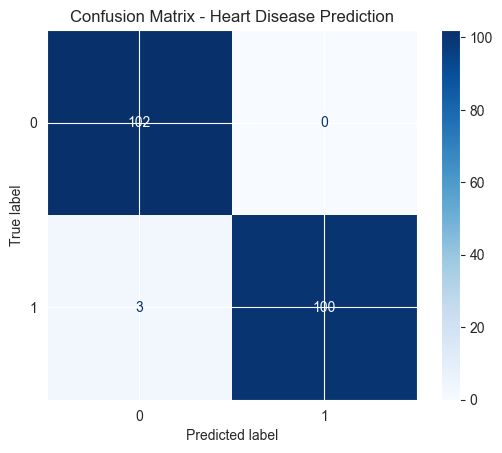

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Heart Disease Prediction")
plt.show()

/Users/kumudbhardwaj/Downloads/Healthcare.AI-main/venv/lib/python3.9/site-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/kumudbhardwaj/Downloads/Healthcare.AI-main/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kumudbhardwaj/Downloads/Healthcare.AI-main/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED

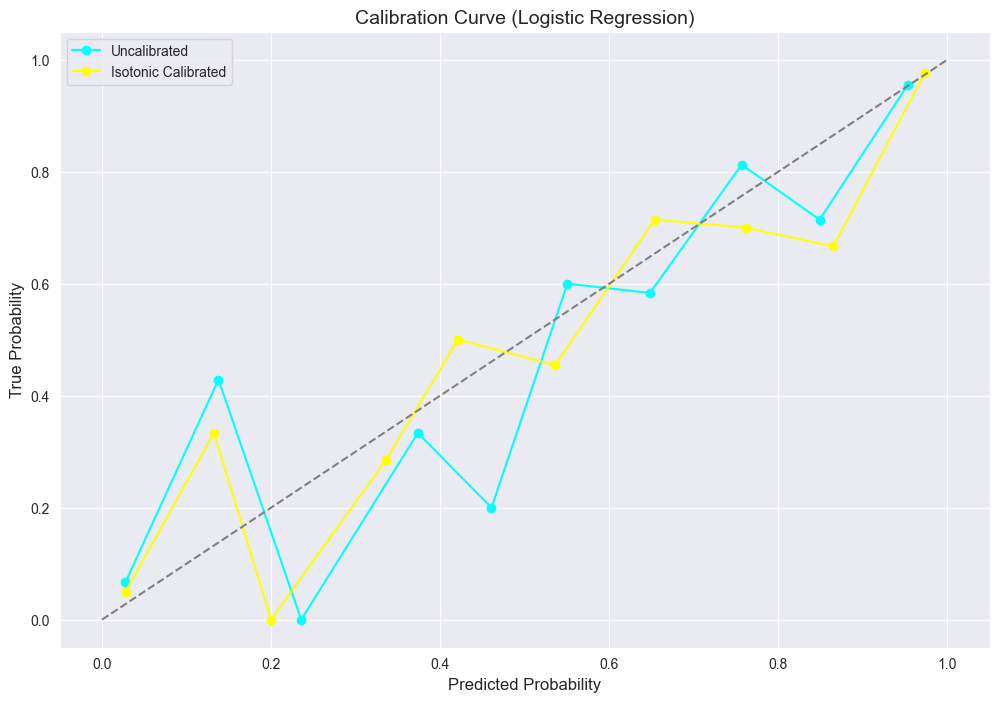

In [27]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities (for positive class)
y_prob_uncalibrated = LR.predict_proba(X_test)[:, 1]

# Fit isotonic calibrated model
calibrated_iso = CalibratedClassifierCV(base_estimator=LR, method='isotonic', cv=5)
calibrated_iso.fit(X_train, y_train)
y_prob_isotonic = calibrated_iso.predict_proba(X_test)[:, 1]

# Get calibration curves
prob_true_uncal, prob_pred_uncal = calibration_curve(y_test, y_prob_uncalibrated, n_bins=10)
prob_true_iso, prob_pred_iso = calibration_curve(y_test, y_prob_isotonic, n_bins=10)

# Plot calibration curve
plt.figure(figsize=(12, 8))
plt.plot(prob_pred_uncal, prob_true_uncal, marker='o', label='Uncalibrated', color='cyan')
plt.plot(prob_pred_iso, prob_true_iso, marker='o', label='Isotonic Calibrated', color='yellow')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Perfect calibration line

plt.title('Calibration Curve (Logistic Regression)', fontsize=14)
plt.xlabel('Predicted Probability', fontsize=12)
plt.ylabel('True Probability', fontsize=12)
plt.legend()
plt.grid(True)
plt.style.use('dark_background')
plt.show()

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier from sklearn.tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import ttest_ind
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('heart.csv')

# Data Preprocessing
X = df.drop(columns='target', axis=1)
y = df['target']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Models (including Logistic Regression with optimized parameters from your grid search)
models = {
    'Logistic Regression': LogisticRegression(C=0.9, class_weight='balanced', max_iter=1000, solver='lbfgs', random_state=42), # Best params from your code + random_state
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Bagging Decision Tree': BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

results = {}
baseline_model_name = 'Logistic Regression'

# Cross-validation and model evaluation
for model_name, model in models.items():
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores_acc = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    cv_scores_prec = cross_val_score(model, X_train, y_train, cv=kf, scoring='precision')
    cv_scores_rec = cross_val_score(model, X_train, y_train, cv=kf, scoring='recall')
    cv_scores_f1 = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1')

    results[model_name] = {
        'Accuracy': {'mean': np.mean(cv_scores_acc), 'std': np.std(cv_scores_acc), 'values': cv_scores_acc},
        'Precision': {'mean': np.mean(cv_scores_prec), 'std': np.std(cv_scores_prec), 'values': cv_scores_prec},
        'Recall': {'mean': np.mean(cv_scores_rec), 'std': np.std(cv_scores_rec), 'values': cv_scores_rec},
        'F1-score': {'mean': np.mean(cv_scores_f1), 'std': np.std(cv_scores_f1), 'values': cv_scores_f1},
    }

def calculate_p_values(results, baseline_model=baseline_model_name):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    for model_name in results:
        if model_name != baseline_model:
            results[model_name]['p-value'] = {}
            for metric in metrics:
                try:
                    _, p_value = ttest_ind(results[baseline_model][metric]['values'], results[model_name][metric]['values'])
                    results[model_name]['p-value'][metric] = p_value
                except Exception as e:
                    print(f"Error calculating p-value for {model_name} and {metric}: {e}")
                    results[model_name]['p-value'][metric] = np.nan
        else:
            results[model_name]['p-value'] = {m: np.nan for m in metrics}
    return results

results = calculate_p_values(results, baseline_model=baseline_model_name)

# Print the table
print("Table: Performance of Machine Learning Models")
print("-------------------------------------------------------------------------------------------------------------------")
print(f"{'ML Models':<25} {'Accuracy':<20} {'Precision':<20} {'Recall':<20} {'F1-score':<20} {'p-value'}")
print("-------------------------------------------------------------------------------------------------------------------")

for model_name, model_data in results.items():
    accuracy_str = f"{model_data['Accuracy']['mean']:.4f} ±{model_data['Accuracy']['std']:.5f}"
    precision_str = f"{model_data['Precision']['mean']:.4f} ±{model_data['Precision']['std']:.5f}"
    recall_str = f"{model_data['Recall']['mean']:.4f} ±{model_data['Recall']['std']:.5f}"
    f1_str = f"{model_data['F1-score']['mean']:.4f} ±{model_data['F1-score']['std']:.5f}"
    p_value_str = {metric: f"{model_data['p-value'][metric]:.4f}" if not np.isnan(model_data['p-value'][metric]) else "N/A" for metric in ['Accuracy', 'Precision', 'Recall', 'F1-score']}

    print(f"{model_name:<25} {accuracy_str:<20} {precision_str:<20} {recall_str:<20} {f1_str:<20} "
          f"{p_value_str['Accuracy']:<10}, {p_value_str['Precision']:<10}, {p_value_str['Recall']:<10}, {p_value_str['F1-score']:<10}")
print("-------------------------------------------------------------------------------------------------------------------")


Table: Performance of Machine Learning Models
-------------------------------------------------------------------------------------------------------------------
ML Models                 Accuracy             Precision            Recall               F1-score             p-value
-------------------------------------------------------------------------------------------------------------------
Logistic Regression       0.8585 ±0.03166      0.8386 ±0.03368      0.9004 ±0.04406      0.8677 ±0.02934      N/A       , N/A       , N/A       , N/A       
Random Forest             0.9732 ±0.02770      0.9656 ±0.03988      0.9834 ±0.01610      0.9742 ±0.02687      0.0006    , 0.0012    , 0.0077    , 0.0007    
Gradient Boosting         0.9561 ±0.02195      0.9414 ±0.03707      0.9764 ±0.00705      0.9583 ±0.02086      0.0010    , 0.0034    , 0.0093    , 0.0010    
Bagging Decision Tree     0.9646 ±0.02711      0.9633 ±0.04189      0.9692 ±0.01259      0.9659 ±0.02636      0.0009    , 0.0017    ,